In [60]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [61]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [62]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [63]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [65]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [66]:
train_df.describe()
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [67]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [68]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [69]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [70]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [71]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


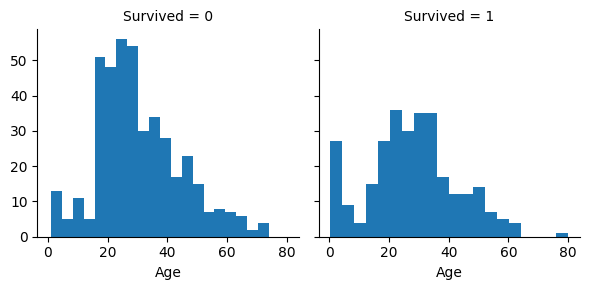

In [72]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

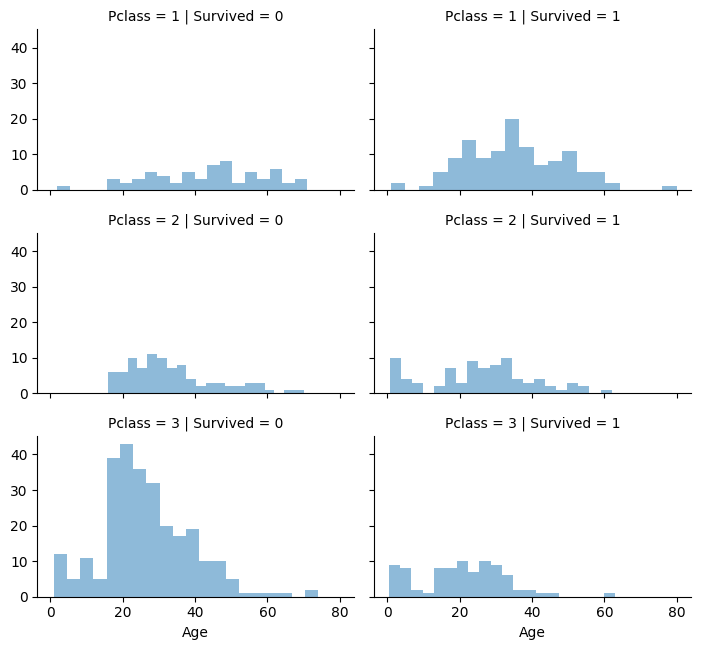

In [73]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


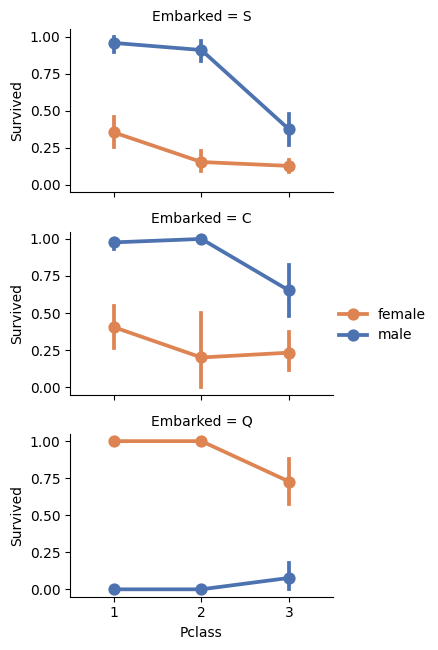

In [74]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/s

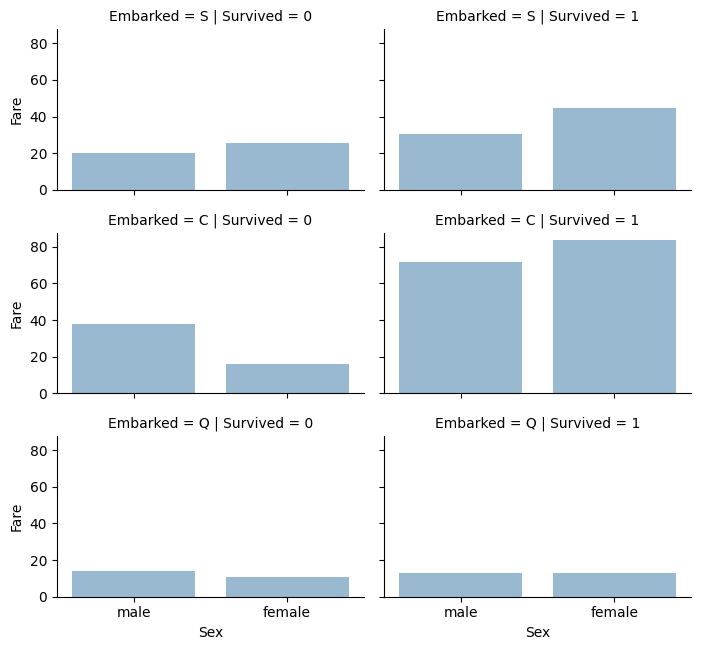

In [75]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [76]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

In [77]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
/var/folders/8f/fl0j10sd6l53l8vcv38yscvr0000gn/T/ipykernel_2058/4149994435.py:2: SyntaxWarning: invalid escape sequence '\.'
  dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We can replace many titles with a more common name or classify them as `Rare`.

In [78]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


We can convert the categorical titles to ordinal.

In [79]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [80]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [81]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


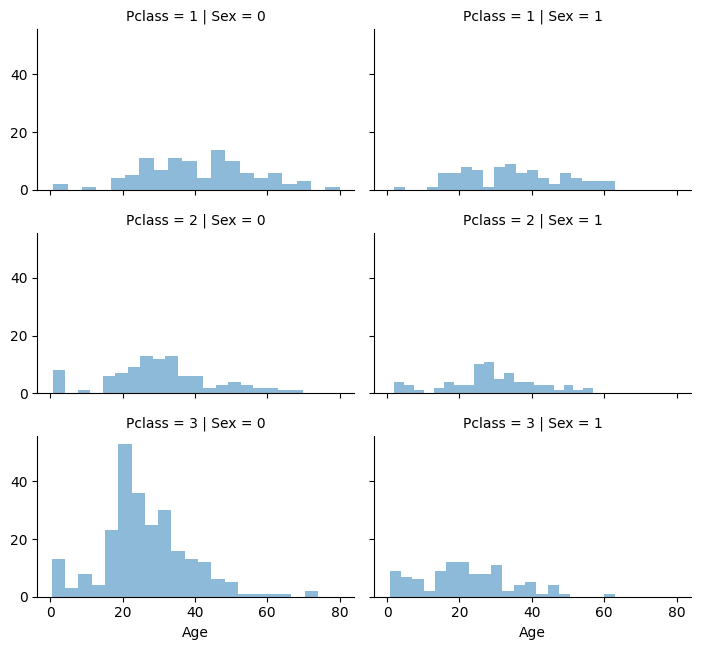

In [82]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [83]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [84]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [85]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

/var/folders/8f/fl0j10sd6l53l8vcv38yscvr0000gn/T/ipykernel_2058/987560108.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [86]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [87]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [88]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [89]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [90]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [91]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [92]:
freq_port = train_df['Embarked'].dropna().mode()[0]

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [93]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [94]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

/var/folders/8f/fl0j10sd6l53l8vcv38yscvr0000gn/T/ipykernel_2058/31889810.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [95]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

/var/folders/8f/fl0j10sd6l53l8vcv38yscvr0000gn/T/ipykernel_2058/2916669673.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [96]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [97]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


In [98]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [99]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

In [100]:
# coeff_df = pd.DataFrame(train_df.columns.delete(0))
# coeff_df.columns = ['Feature']
# coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

# coeff_df.sort_values(by='Correlation', ascending=False)

# Create DataFrame of features and coefficients
coeff_df = pd.DataFrame({
    "Feature": train_df.columns[1:],  # exclude target column
    "Coefficient": logreg.coef_[0]
})

# Add absolute coefficient for importance ranking
coeff_df["Abs_Coefficient"] = coeff_df["Coefficient"].abs()

# Sort by importance (absolute value) for better interpretability
coeff_sorted = coeff_df.sort_values(by="Abs_Coefficient", ascending=False).reset_index(drop=True)

# Display sorted DataFrame
print(coeff_sorted)

     Feature  Coefficient  Abs_Coefficient
0        Sex     2.201445         2.201445
1     Pclass    -0.750392         0.750392
2      Title     0.397484         0.397484
3  Age*Class    -0.310963         0.310963
4        Age     0.286911         0.286911
5   Embarked     0.261583         0.261583
6    IsAlone     0.126942         0.126942
7       Fare    -0.086368         0.086368


In [101]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.23

In [102]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.85

In [103]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

In [104]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.34

In [105]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

78.9

In [106]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

78.68

In [107]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

In [108]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

In [109]:
# models = pd.DataFrame({
#     'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
#               'Random Forest', 'Naive Bayes', 'Perceptron', 
#               'Stochastic Gradient Decent', 'Linear SVC', 
#               'Decision Tree'],
#     'Score': [acc_svc, acc_knn, acc_log, 
#               acc_random_forest, acc_gaussian, acc_perceptron, 
#               acc_sgd, acc_linear_svc, acc_decision_tree]})
# models.sort_values(by='Score', ascending=False)

# Create DataFrame with model names and their accuracies
# Create DataFrame with models and accuracies
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines',
        'K-Nearest Neighbors',
        'Logistic Regression',
        'Random Forest',
        'Naive Bayes',
        'Perceptron',
        'Stochastic Gradient Descent',
        'Linear SVC',
        'Decision Tree'
    ],
    'Accuracy': [
        acc_svc,
        acc_knn,
        acc_log,
        acc_random_forest,
        acc_gaussian,
        acc_perceptron,
        acc_sgd,
        acc_linear_svc,
        acc_decision_tree
    ]
})

# Sort by accuracy and add ranking
models_sorted = (
    models.sort_values(by='Accuracy', ascending=False)
    .reset_index(drop=True)
)
models_sorted.index += 1  # start ranking at 1
models_sorted.index.name = "Rank"

# Display neatly
print(models_sorted)

                            Model  Accuracy
Rank                                       
1                   Random Forest     86.76
2                   Decision Tree     86.76
3             K-Nearest Neighbors     84.85
4             Logistic Regression     80.36
5                      Linear SVC     78.90
6     Stochastic Gradient Descent     78.68
7                      Perceptron     78.34
8         Support Vector Machines     78.23
9                     Naive Bayes     72.28


In [110]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
# submission.to_csv('../output/submission.csv', index=False)

To improve the Model I will set the following parameters after setting the train and test  sets

In [ ]:
# import numpy as np
# import pandas as pd
# from pathlib import Path

# # -------------------------
# # 0) Load data
# # -------------------------
# train_path = Path("train.csv")
# test_path  = Path("test.csv")
# train_df = pd.read_csv(train_path)
# test_df  = pd.read_csv(test_path)
# combine = [train_df, test_df]
# # -------------------------
# # 1) Feature engineering
# # -------------------------
# # Helper: extract Title from Name
# def extract_title(name: str) -> str:
#     try:
#         return name.split(',')[1].split('.')[0].strip()
#     except Exception:
#         return "Unknown"

# # Helper: normalize rare titles
# def normalize_title(t: str) -> str:
#     mapping = {
#         'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs',
#         'Lady':'Royal', 'Countess':'Royal', 'Sir':'Royal', 'Don':'Royal',
#         'Jonkheer':'Royal', 'Dona':'Royal', 'the Countess':'Royal',
#         'Capt':'Officer', 'Col':'Officer', 'Major':'Officer', 'Dr':'Officer',
#         'Rev':'Officer'
#     }
#     return mapping.get(t, t)

# # Tickets have prefixes sometimes (e.g., "PC 17599"); grab alphabetic prefix
# import re
# def ticket_prefix(t: str) -> str:
#     if pd.isna(t):
#         return "NONE"
#     m = re.match(r"([A-Za-z\.\/]+)", str(t))
#     return m.group(1).replace('.', '').replace('/', '') if m else "NONE"

# # Cabin deck: first letter of cabin
# def cabin_deck(c: str) -> str:
#     if pd.isna(c) or not isinstance(c, str) or len(c) == 0:
#         return "U"  # unknown
#     return c[0]

# for df in (train_df, test_df):
#     df["Title"] = df["Name"].apply(extract_title).apply(normalize_title)
#     df["FamilySize"] = df["SibSp"].fillna(0) + df["Parch"].fillna(0) + 1
#     df["IsAlone"]    = (df["FamilySize"] == 1).astype(int)
#     df["Deck"]       = df["Cabin"].apply(cabin_deck)
#     df["TicketPrefix"] = df["Ticket"].astype(str).apply(ticket_prefix)
#     df["TicketLen"]  = df["Ticket"].astype(str).apply(len)
#     # Interaction that often helps
#     df["Age*Class"]  = df["Age"] * df["Pclass"]

# # Chosen features (balanced: numeric + categorical)
# feature_cols_num = [
#     "Age", "SibSp", "Parch", "Fare",
#     "FamilySize", "IsAlone", "TicketLen", "Age*Class"
# ]
# # Treat Pclass as categorical (works well on Titanic)
# feature_cols_cat = [
#     "Pclass", "Sex", "Embarked", "Title", "Deck", "TicketPrefix"
# ]
# feature_cols = feature_cols_num + feature_cols_cat

# X_train = train_df[feature_cols].copy()
# y_train = train_df["Survived"].copy()
# X_test  = test_df[feature_cols].copy()

# # -------------------------
# # 2) Preprocessing
# # -------------------------
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import Pipeline

# num_cols = feature_cols_num
# cat_cols = feature_cols_cat

# numeric_pipe = Pipeline(steps=[
#     ("imputer", SimpleImputer(strategy="median")),
#     ("scaler", StandardScaler())
# ])

# categorical_pipe = Pipeline(steps=[
#     ("imputer", SimpleImputer(strategy="most_frequent")),
#     ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=True))
# ])

# preprocess = ColumnTransformer(
#     transformers=[
#         ("num", numeric_pipe, num_cols),
#         ("cat", categorical_pipe, cat_cols),
#     ],
#     remainder="drop"
# )

# # GaussianNB needs dense input after OHE
# to_dense = FunctionTransformer(lambda x: x.toarray() if hasattr(x, "toarray") else x, accept_sparse=True)

# # -------------------------
# # 3) Models, grids, and CV
# # -------------------------
# from sklearn.model_selection import GridSearchCV, StratifiedKFold
# from sklearn.metrics import accuracy_score, make_scorer

# from sklearn.svm import SVC, LinearSVC
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
# from sklearn.ensemble import RandomForestClassifier, VotingClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# scorer = make_scorer(accuracy_score)

# # Pipelines sharing preprocess
# pipelines = {
#     "svc":        Pipeline([("prep", preprocess), ("clf", SVC(probability=True, random_state=42))]),
#     "knn":        Pipeline([("prep", preprocess), ("clf", KNeighborsClassifier())]),
#     "logreg":     Pipeline([("prep", preprocess), ("clf", LogisticRegression(max_iter=4000, random_state=42))]),
#     "rf":         Pipeline([("prep", preprocess), ("clf", RandomForestClassifier(random_state=42))]),
#     "gnb":        Pipeline([("prep", preprocess), ("to_dense", to_dense), ("clf", GaussianNB())]),
#     "perceptron": Pipeline([("prep", preprocess), ("clf", Perceptron(random_state=42))]),
#     "sgd":        Pipeline([("prep", preprocess), ("clf", SGDClassifier(random_state=42))]),
#     "linear_svc": Pipeline([("prep", preprocess), ("clf", LinearSVC(random_state=42))]),
#     "dt":         Pipeline([("prep", preprocess), ("clf", DecisionTreeClassifier(random_state=42))]),
# }

# # Strong but not crazy grids (expand if any model < 0.86)
# param_grids = {
#     "svc": {
#         "clf__C": [0.5, 1, 2, 4, 8],
#         "clf__kernel": ["rbf", "linear"],
#         "clf__gamma": ["scale", "auto"]
#     },
#     "knn": {
#         "clf__n_neighbors": [3, 5, 7, 9, 11, 15],
#         "clf__weights": ["uniform", "distance"],
#         "clf__p": [1, 2]  # Manhattan / Euclidean
#     },
#     "logreg": {
#         "clf__C": [0.5, 1, 2, 4, 8],
#         "clf__penalty": ["l2"],
#         "clf__solver": ["lbfgs", "liblinear"]
#     },
#     "rf": {
#         "clf__n_estimators": [300, 500, 800],
#         "clf__max_depth": [None, 8, 12, 16, 20],
#         "clf__min_samples_split": [2, 5, 10],
#         "clf__min_samples_leaf": [1, 2, 4],
#         "clf__max_features": [None, "sqrt", "log2"]
#     },
#     "gnb": {
#         "clf__var_smoothing": np.logspace(-11, -7, 7)
#     },
#     "perceptron": {
#         "clf__penalty": [None, "l2", "l1", "elasticnet"],
#         "clf__alpha": [1e-5, 1e-4, 1e-3, 1e-2],
#         "clf__early_stopping": [True]
#     },
#     "sgd": {
#         "clf__loss": ["log_loss", "hinge"],
#         "clf__penalty": ["l2", "elasticnet"],
#         "clf__alpha": [1e-5, 1e-4, 1e-3, 1e-2],
#         "clf__early_stopping": [True]
#     },
#     "linear_svc": {
#         "clf__C": [0.5, 1, 2, 4, 8]
#     },
#     "dt": {
#         "clf__criterion": ["gini", "entropy", "log_loss"],
#         "clf__max_depth": [None, 4, 6, 8, 12, 16],
#         "clf__min_samples_split": [2, 5, 10],
#         "clf__min_samples_leaf": [1, 2, 4],
#         "clf__max_features": [None, "sqrt", "log2"]
#     }
# }

# # -------------------------
# # 4) Tune all models
# # -------------------------
# best_models = {}
# cv_scores = {}

# for name, pipe in pipelines.items():
#     grid = GridSearchCV(
#         estimator=pipe,
#         param_grid=param_grids[name],
#         cv=cv,
#         scoring=scorer,
#         n_jobs=-1,
#         refit=True,
#         verbose=0
#     )
#     grid.fit(X_train, y_train)
#     best_models[name] = grid.best_estimator_
#     cv_scores[name] = grid.best_score_

# # -------------------------
# # 5) Optional: build an ensemble from top models
# # -------------------------
# # Pick top 3 base learners for a soft voting ensemble (skip linear_svc/perceptron/sgd since they may not have predict_proba)
# top_sorted = sorted(cv_scores.items(), key=lambda kv: kv[1], reverse=True)
# top_prob = [k for k, v in top_sorted if k in ("svc", "rf", "logreg", "knn", "gnb")]
# top_prob = top_prob[:3] if len(top_prob) >= 3 else top_prob

# if len(top_prob) >= 2:
#     estimators = [(k, best_models[k]) for k in top_prob]
#     ensemble = VotingClassifier(estimators=estimators, voting="soft", n_jobs=-1)
#     # Fit ensemble via same CV to report a fair estimate
#     from sklearn.model_selection import cross_val_score
#     ens_scores = cross_val_score(ensemble, X_train, y_train, cv=cv, scoring="accuracy", n_jobs=-1)
#     cv_scores["voting_ensemble"] = ens_scores.mean()
#     best_models["voting_ensemble"] = ensemble.fit(X_train, y_train)

# # -------------------------
# # 6) Map into your expected variables for summary
# # -------------------------
# acc_svc             = cv_scores.get("svc", np.nan)
# acc_knn             = cv_scores.get("knn", np.nan)
# acc_log             = cv_scores.get("logreg", np.nan)
# acc_random_forest   = cv_scores.get("rf", np.nan)
# acc_gaussian        = cv_scores.get("gnb", np.nan)
# acc_perceptron      = cv_scores.get("perceptron", np.nan)
# acc_sgd             = cv_scores.get("sgd", np.nan)
# acc_linear_svc      = cv_scores.get("linear_svc", np.nan)
# acc_decision_tree   = cv_scores.get("dt", np.nan)

# # -------------------------
# # 7) Print ranked results
# # -------------------------
# models_df = pd.DataFrame({
#     "Model": [
#         "Support Vector Machines",
#         "K-Nearest Neighbors",
#         "Logistic Regression",
#         "Random Forest",
#         "Naive Bayes",
#         "Perceptron",
#         "Stochastic Gradient Descent",
#         "Linear SVC",
#         "Decision Tree",
#         *(["Voting Ensemble"] if "voting_ensemble" in cv_scores else [])
#     ],
#     "Accuracy": [
#         acc_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian,
#         acc_perceptron, acc_sgd, acc_linear_svc, acc_decision_tree,
#         *( [cv_scores["voting_ensemble"]] if "voting_ensemble" in cv_scores else [] )
#     ]
# })

# models_sorted = models_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
# models_sorted.index += 1
# models_sorted.index.name = "Rank"
# print(models_sorted.to_string(index=True, justify="left", max_colwidth=None))

# # 
# param_grids["svc"]["clf__C"] = [0.25, 0.5, 1, 2, 4, 8, 12]
# param_grids["rf"]["clf__n_estimators"] = [500, 800, 1000, 1200]
# param_grids["rf"]["clf__max_depth"] = [None, 12, 16, 20, 24]
# param_grids["knn"]["clf__n_neighbors"] = [3, 5, 7, 9, 11, 15, 21]
# param_grids["logreg"]["clf__C"] = [0.25, 0.5, 1, 2, 4, 8, 12]
# param_grids["linear_svc"]["clf__C"] = [0.25, 0.5, 1, 2, 4, 8, 12]
# param_grids["sgd"]["clf__alpha"] = [1e-6, 1e-5, 1e-4, 1e-3]
# param_grids["dt"]["clf__max_depth"] = [None, 8, 12, 16, 20, 24]
# # (Then re-run the tuning loop.)

     Model                         Accuracy
Rank                                       
1                   Random Forest  0.842847
2                 Voting Ensemble  0.839508
3         Support Vector Machines  0.837261
4             K-Nearest Neighbors  0.832779
5             Logistic Regression  0.828272
6     Stochastic Gradient Descent  0.827155
7                      Linear SVC  0.824901
8                   Decision Tree  0.823759
9                      Perceptron  0.780008
10                    Naive Bayes  0.448898


In [ ]:
# import numpy as np
# import pandas as pd
# from pathlib import Path
# from typing import Optional, Tuple, List, Dict

# # =========================
# # 0) Load data
# # =========================
# train_path = Path("train.csv")
# test_path  = Path("test.csv")
# train_df = pd.read_csv(train_path)
# test_df  = pd.read_csv(test_path)

# # =========================
# # 1) Feature engineering
# # =========================
# import re

# def extract_title(name: str) -> str:
#     try:
#         return name.split(',')[1].split('.')[0].strip()
#     except Exception:
#         return "Unknown"

# def normalize_title(t: str) -> str:
#     mapping = {
#         'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs',
#         'Lady':'Royal', 'Countess':'Royal', 'Sir':'Royal', 'Don':'Royal',
#         'Jonkheer':'Royal', 'Dona':'Royal', 'the Countess':'Royal',
#         'Capt':'Officer', 'Col':'Officer', 'Major':'Officer', 'Dr':'Officer',
#         'Rev':'Officer'
#     }
#     return mapping.get(t, t)

# def ticket_prefix(t: str) -> str:
#     if pd.isna(t):
#         return "NONE"
#     m = re.match(r"([A-Za-z\.\/]+)", str(t))
#     return m.group(1).replace('.', '').replace('/', '') if m else "NONE"

# def cabin_deck(c: str) -> str:
#     if pd.isna(c) or not isinstance(c, str) or len(c) == 0:
#         return "U"
#     return c[0]

# def surname(name: str) -> str:
#     try:
#         return name.split(',')[0].strip()
#     except Exception:
#         return "UNK"

# def add_base_features(df: pd.DataFrame) -> pd.DataFrame:
#     out = df.copy()
#     out["Title"] = out["Name"].apply(extract_title).apply(normalize_title)
#     out["FamilySize"] = out["SibSp"].fillna(0) + out["Parch"].fillna(0) + 1
#     out["IsAlone"]    = (out["FamilySize"] == 1).astype(int)
#     out["Deck"]       = out["Cabin"].apply(cabin_deck)
#     out["TicketPrefix"] = out["Ticket"].astype(str).apply(ticket_prefix)
#     out["TicketLen"]  = out["Ticket"].astype(str).apply(len)
#     out["Age*Class"]  = out["Age"] * out["Pclass"]
#     out["FarePerPerson"] = out["Fare"] / out["FamilySize"].replace(0, 1)
#     out["Surname"] = out["Name"].apply(surname)
#     # Ticket frequency feature (how common a ticket appears)
#     ticket_counts = out["Ticket"].astype(str).value_counts()
#     out["TicketFreq"] = out["Ticket"].astype(str).map(ticket_counts).astype(int)
#     return out

# train_df = add_base_features(train_df)
# test_df  = add_base_features(test_df)

# # Columns
# feature_cols_num = [
#     "Age", "SibSp", "Parch", "Fare",
#     "FamilySize", "IsAlone", "TicketLen", "Age*Class",
#     "FarePerPerson", "TicketFreq"
# ]
# feature_cols_cat = [
#     "Pclass", "Sex", "Embarked", "Title", "Deck", "TicketPrefix"
# ]
# feature_cols = feature_cols_num + feature_cols_cat

# # (Move this block after Surname_TE is added to train_df and test_df)

# # X_train = train_df[feature_cols].copy()
# # y_train = train_df["Survived"].astype(int).copy()
# # X_test  = test_df[feature_cols].copy()

# # =========================
# # 2) Preprocessing (smarter imputation)
# # =========================
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.impute import SimpleImputer, KNNImputer
# from sklearn.pipeline import Pipeline

# num_cols = feature_cols_num
# cat_cols = feature_cols_cat

# # Age/Fare benefit from KNNImputer after basic fill; we’ll run KNN on all numeric block
# numeric_pipe = Pipeline(steps=[
#     ("imputer0", SimpleImputer(strategy="median")),
#     ("knnimp", KNNImputer(n_neighbors=5, weights="distance")),
#     ("scaler", StandardScaler())
# ])

# categorical_pipe = Pipeline(steps=[
#     ("imputer", SimpleImputer(strategy="most_frequent")),
#     ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
# ])

# preprocess = ColumnTransformer(
#     transformers=[
#         ("num", numeric_pipe, num_cols),
#         ("cat", categorical_pipe, cat_cols),
#     ],
#     remainder="drop"
# )

# # =========================
# # 3) Out-of-fold (OOF) target encoding for Surname (family survival signal)
# #    — avoids leakage and often gives a nice boost on Titanic.
# # =========================
# from sklearn.model_selection import StratifiedKFold

# def oof_target_encode(
#     X: pd.DataFrame, y: pd.Series, X_test: Optional[pd.DataFrame],
#     col: str, n_splits: int = 5, smoothing: float = 10.0, random_state: int = 42
# ) -> Tuple[pd.Series, Optional[pd.Series]]:
#     skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
#     global_mean = y.mean()
#     oof = pd.Series(index=X.index, dtype=float)
#     if X_test is not None:
#         te_map_full = X.groupby(col)["Survived"].mean()
#         # smooth full map
#         counts_full = X[col].value_counts()
#         smooth_full = (te_map_full * counts_full + global_mean * smoothing) / (counts_full + smoothing)
#         test_encoded = X_test[col].map(smooth_full).fillna(global_mean)
#     else:
#         test_encoded = None

#     for train_idx, valid_idx in skf.split(X, y):
#         tr, va = X.iloc[train_idx], X.iloc[valid_idx]
#         tr_y = y.iloc[train_idx]
#         means = tr.groupby(col)["Survived"].mean()
#         counts = tr[col].value_counts()
#         smooth = (means * counts + global_mean * smoothing) / (counts + smoothing)
#         oof.iloc[valid_idx] = X.iloc[valid_idx][col].map(smooth).fillna(global_mean)
#     return oof, test_encoded

# # Create OOF encoded Surname feature
# tmp_train = train_df[["Surname"]].copy()
# tmp_train["Survived"] = train_df["Survived"].values
# tmp_test = test_df[["Surname"]].copy()

# # Generate OOF target encoding for Surname
# surname_tr, surname_te = oof_target_encode(
#     tmp_train, tmp_train["Survived"], tmp_test, col="Surname"
# )

# # Assign the encoded values to the DataFrames
# train_df["Surname_TE"] = surname_tr.values
# test_df["Surname_TE"] = surname_te.values

# # Add Surname_TE into numeric block
# num_cols = feature_cols_num + ["Surname_TE"]
# feature_cols = num_cols + cat_cols

# # Now that Surname_TE is added, create X_train and X_test
# X_train = train_df[feature_cols].copy()
# y_train = train_df["Survived"].astype(int).copy()
# X_test  = test_df[feature_cols].copy()

# # Rebuild preprocess with the updated numeric list
# numeric_pipe = Pipeline(steps=[
#     ("imputer0", SimpleImputer(strategy="median")),
#     ("knnimp", KNNImputer(n_neighbors=5, weights="distance")),
#     ("scaler", StandardScaler())
# ])
# categorical_pipe = Pipeline(steps=[
#     ("imputer", SimpleImputer(strategy="most_frequent")),
#     ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
# ])
# preprocess = ColumnTransformer(
#     transformers=[
#         ("num", numeric_pipe, num_cols),
#         ("cat", categorical_pipe, cat_cols),
#     ],
#     remainder="drop"
# )

# # =========================
# # 4) Models & Stacking Ensemble
# # =========================
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
# from sklearn.model_selection import GridSearchCV, cross_val_score

# cv_splits = 10  # bump to 10 for a little more stability at high accuracy
# skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)

# # Base learners (strong defaults)
# svc_pipe = Pipeline([
#     ("prep", preprocess),
#     ("clf", SVC(kernel="rbf", C=2.0, gamma="scale", probability=True, random_state=42)),
# ])

# hgb_pipe = Pipeline([
#     ("prep", preprocess),
#     ("clf", HistGradientBoostingClassifier(
#         l2_regularization=0.0,
#         learning_rate=0.05,
#         max_depth=None,
#         max_iter=600,
#         min_samples_leaf=10,
#         random_state=42
#     )),
# ])

# logreg_pipe = Pipeline([
#     ("prep", preprocess),
#     ("clf", LogisticRegression(max_iter=6000, C=2.0, solver="lbfgs", random_state=42))
# ])

# # Quick tuning on SVC and HGB (focused search that tends to help)
# svc_grid = {
#     "clf__C": [1.0, 2.0, 3.0, 4.0],
#     "clf__gamma": ["scale", 0.08, 0.06, 0.04]
# }
# hgb_grid = {
#     "clf__learning_rate": [0.03, 0.05, 0.07],
#     "clf__max_iter": [500, 700, 900],
#     "clf__min_samples_leaf": [5, 10, 20],
#     "clf__l2_regularization": [0.0, 0.5, 1.0]
# }

# svc_search = GridSearchCV(svc_pipe, svc_grid, cv=skf, scoring="accuracy", n_jobs=-1, refit=True, verbose=0)
# hgb_search = GridSearchCV(hgb_pipe, hgb_grid, cv=skf, scoring="accuracy", n_jobs=-1, refit=True, verbose=0)

# svc_search.fit(X_train, y_train)
# hgb_search.fit(X_train, y_train)

# best_svc = svc_search.best_estimator_
# best_hgb = hgb_search.best_estimator_

# # Stacking with Logistic meta-learner
# from sklearn.ensemble import StackingClassifier

# stack = StackingClassifier(
#     estimators=[
#         ("hgb", best_hgb),
#         ("svc", best_svc),
#         ("lr",  logreg_pipe)
#     ],
#     final_estimator=LogisticRegression(max_iter=4000, C=1.5, solver="lbfgs", random_state=42),
#     stack_method="auto",
#     passthrough=False,
#     n_jobs=-1,
#     cv=skf
# )

# stack_scores = cross_val_score(stack, X_train, y_train, cv=skf, scoring="accuracy", n_jobs=-1)
# stack_acc = stack_scores.mean()
# print(f"[Stacking] {cv_splits}-fold CV accuracy: {stack_acc:.4f} (+/- {stack_scores.std():.4f})")

# # Fit the stack on all data and prepare leaderboard table with baselines
# from sklearn.metrics import accuracy_score

# svc_scores = cross_val_score(best_svc, X_train, y_train, cv=skf, scoring="accuracy", n_jobs=-1)
# hgb_scores = cross_val_score(best_hgb, X_train, y_train, cv=skf, scoring="accuracy", n_jobs=-1)
# lr_scores  = cross_val_score(logreg_pipe, X_train, y_train, cv=skf, scoring="accuracy", n_jobs=-1)

# models_df = pd.DataFrame({
#     "Model": ["HistGradientBoosting (tuned)", "RBF-SVC (tuned)", "Logistic Regression", "Stacking Ensemble"],
#     "CV Mean Acc": [hgb_scores.mean(), svc_scores.mean(), lr_scores.mean(), stack_acc],
#     "CV Std": [hgb_scores.std(), svc_scores.std(), lr_scores.std(), stack_scores.std()]
# }).sort_values("CV Mean Acc", ascending=False).reset_index(drop=True)

# print("\n=== Model CV leaderboard ===")
# print(models_df.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

# # Train final stack and make predictions for submission (optional)
# stack.fit(X_train, y_train)

# # If you want a Kaggle submission:
# test_pred = stack.predict(test_df[feature_cols])
# sub = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": test_pred})
# sub.to_csv("submission_stack.csv", index=False)
# print("\nSaved: submission_stack.csv")

[Stacking] 10-fold CV accuracy: 0.8495 (+/- 0.0328)

=== Model CV leaderboard ===
                       Model  CV Mean Acc  CV Std
           Stacking Ensemble       0.8495  0.0328
HistGradientBoosting (tuned)       0.8484  0.0317
             RBF-SVC (tuned)       0.8428  0.0371
         Logistic Regression       0.8260  0.0344

Saved: submission_stack.csv


In [6]:
import pandas as pd
import numpy as np
from typing import Optional, Tuple
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline

# Load Titanic datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Extract Deck from Cabin (first letter or 'U' for unknown)
train_df["Deck"] = train_df["Cabin"].str[0].fillna("U")
test_df["Deck"] = test_df["Cabin"].str[0].fillna("U")

def oof_target_encode_generic(
    X: pd.DataFrame, y: pd.Series, X_test: Optional[pd.DataFrame],
    col: str, n_splits: int = 5, smoothing: float = 10.0, random_state: int = 42
) -> Tuple[pd.Series, Optional[pd.Series]]:
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    global_mean = y.mean()
    oof = pd.Series(index=X.index, dtype=float)
    test_encoded = None
    if X_test is not None:
        means_full = X.groupby(col)["Survived"].mean()
        counts_full = X[col].value_counts()
        smooth_full = (means_full * counts_full + global_mean * smoothing) / (counts_full + smoothing)
        test_encoded = X_test[col].map(smooth_full).fillna(global_mean)
    for tr_idx, va_idx in skf.split(X, y):
        tr, va = X.iloc[tr_idx], X.iloc[va_idx]
        means = tr.groupby(col)["Survived"].mean()
        counts = tr[col].value_counts()
        smooth = (means * counts + global_mean * smoothing) / (counts + smoothing)
        oof.iloc[va_idx] = X.iloc[va_idx][col].map(smooth).fillna(global_mean)
    return oof, test_encoded

# Ticket_TE and Deck_TE (group survival priors)
tmp_train2 = train_df[["Ticket", "Deck"]].copy()
tmp_train2["Survived"] = train_df["Survived"].values
tmp_test2 = test_df[["Ticket", "Deck"]].copy()

ticket_tr, ticket_te = oof_target_encode_generic(tmp_train2.rename(columns={"Ticket":"Key"}), train_df["Survived"], tmp_test2.rename(columns={"Ticket":"Key"}), col="Key", n_splits=5, smoothing=20.0)
deck_tr,   deck_te   = oof_target_encode_generic(tmp_train2.rename(columns={"Deck":"Key"}),   train_df["Survived"], tmp_test2.rename(columns={"Deck":"Key"}),   col="Key", n_splits=5, smoothing=10.0)

train_df["Ticket_TE"] = ticket_tr.values
test_df["Ticket_TE"]  = ticket_te.values
train_df["Deck_TE"]   = deck_tr.values
test_df["Deck_TE"]    = deck_te.values

# Define numeric and categorical feature columns
feature_cols_num = [
    "Pclass", "Age", "SibSp", "Parch", "Fare"
    # Add other numeric columns if present
]
feature_cols_cat = [
    "Sex", "Embarked"
    # Add other categorical columns if present
]

# Add to numeric features and rebuild matrices
num_cols = feature_cols_num + ["Ticket_TE", "Deck_TE"]
feature_cols = num_cols + feature_cols_cat

X_train = train_df[feature_cols].copy()
y_train = train_df["Survived"].astype(int).copy()
X_test  = test_df[feature_cols].copy()

# Rebuild preprocess with the updated numeric list
numeric_pipe = Pipeline(steps=[
    ("imputer0", SimpleImputer(strategy="median")),
    ("knnimp", KNNImputer(n_neighbors=5, weights="distance")),
    ("scaler", StandardScaler())
])
categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, feature_cols_cat),
    ],
    remainder="drop"
)

from sklearn.base import BaseEstimator, ClassifierMixin, clone
from sklearn.metrics import accuracy_score
from sklearn.utils.validation import check_is_fitted

class ThresholdTuner(BaseEstimator, ClassifierMixin):
    """
    Wraps a probabilistic estimator. Within fit(), performs an inner CV on the
    training fold to choose the probability threshold that maximizes accuracy.
    Works with predict_proba() or decision_function().
    """
    def __init__(self, estimator=None, inner_cv=3):
        self.estimator = estimator
        self.inner_cv = inner_cv

    def fit(self, X, y):
        self.estimator_ = clone(self.estimator)
        skf_inner = StratifiedKFold(n_splits=self.inner_cv, shuffle=True, random_state=42)
        best_thr, best_acc = 0.5, -np.inf
        for tr_idx, va_idx in skf_inner.split(X, y):
            Xi_tr, Xi_va = X.iloc[tr_idx], X.iloc[va_idx]
            yi_tr, yi_va = y.iloc[tr_idx], y.iloc[va_idx]
            est_i = clone(self.estimator).fit(Xi_tr, yi_tr)
            if hasattr(est_i, "predict_proba"):
                scores = est_i.predict_proba(Xi_va)[:, 1]
            else:
                df = est_i.decision_function(Xi_va)
                mn, mx = df.min(), df.max()
                scores = (df - mn) / (mx - mn + 1e-9)
            qs = np.unique(np.quantile(scores, np.linspace(0.05, 0.95, 19)))
            for thr in qs:
                pred = (scores >= thr).astype(int)
                acc = accuracy_score(yi_va, pred)
                if acc > best_acc:
                    best_acc, best_thr = acc, thr
        self.estimator_.fit(X, y)
        self.threshold_ = best_thr
        return self

    def predict(self, X):
        check_is_fitted(self, ["estimator_", "threshold_"])
        if hasattr(self.estimator_, "predict_proba"):
            scores = self.estimator_.predict_proba(X)[:, 1]
        else:
            df = self.estimator_.decision_function(X)
            mn, mx = df.min(), df.max()
            scores = (df - mn) / (mx - mn + 1e-9)
        return (scores >= self.threshold_).astype(int)

    def get_params(self, deep=True):
        params = super().get_params(deep=deep)
        if deep and hasattr(self.estimator, "get_params"):
            estimator_params = self.estimator.get_params().items()
            for key, value in estimator_params:
                params[f"estimator__{key}"] = value
        return params

    def set_params(self, **params):
        estimator_params = {}
        for key in list(params.keys()):
            if key.startswith("estimator__"):
                estimator_params[key[len("estimator__"):]] = params.pop(key)
        super().set_params(**params)
        if estimator_params and self.estimator is not None:
            self.estimator.set_params(**estimator_params)
        return self

# =========================
# 5) Strong model suite (all threshold-tuned) + grids
# =========================
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier

cv_splits = 10
skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)

def make_pipe(clf):
    return Pipeline([("prep", preprocess), ("clf", clf)])

models = {
    "SVC_RBF": make_pipe(SVC(kernel="rbf", probability=True, random_state=42)),
    "HistGB":  make_pipe(HistGradientBoostingClassifier(random_state=42)),
    "ExtraTrees": make_pipe(ExtraTreesClassifier(random_state=42)),
    "RandomForest": make_pipe(RandomForestClassifier(random_state=42)),
    "GradBoost": make_pipe(GradientBoostingClassifier(random_state=42)),
    "LogReg": make_pipe(LogisticRegression(max_iter=8000, random_state=42))
}

param_grids = {
    "SVC_RBF": {
        "estimator__clf__C": [1.0, 2.0, 3.0, 4.0, 6.0, 8.0],
        "estimator__clf__gamma": ["scale", 0.08, 0.06, 0.04, 0.03, 0.02]
    },
    "HistGB": {
        "estimator__clf__learning_rate": [0.03, 0.05, 0.07],
        "estimator__clf__max_iter": [500, 700, 900],
        "estimator__clf__min_samples_leaf": [5, 10, 20],
        "estimator__clf__l2_regularization": [0.0, 0.5, 1.0],
        "estimator__clf__max_depth": [None, 3, 4]
    },
    "ExtraTrees": {
        "estimator__clf__n_estimators": [500, 800, 1200],
        "estimator__clf__max_depth": [None, 12, 16, 24],
        "estimator__clf__min_samples_split": [2, 5, 10],
        "estimator__clf__min_samples_leaf": [1, 2, 4],
        "estimator__clf__max_features": ["sqrt", "log2", None]
    },
    "RandomForest": {
        "estimator__clf__n_estimators": [500, 800, 1200],
        "estimator__clf__max_depth": [None, 12, 16, 24],
        "estimator__clf__min_samples_split": [2, 5, 10],
        "estimator__clf__min_samples_leaf": [1, 2, 4],
        "estimator__clf__max_features": ["sqrt", "log2", None]
    },
    "GradBoost": {
        "estimator__clf__learning_rate": [0.03, 0.05, 0.07],
        "estimator__clf__n_estimators": [200, 400, 600],
        "estimator__clf__max_depth": [2, 3, 4],
        "estimator__clf__subsample": [0.8, 1.0]
    },
    "LogReg": {
        "estimator__clf__C": [0.5, 1.0, 2.0, 4.0, 8.0],
        "estimator__clf__solver": ["lbfgs", "liblinear"],
        "estimator__clf__penalty": ["l2"]
    }
}

from sklearn.model_selection import GridSearchCV, cross_val_score

results = []
best_pipes = {}
best_models = {}
cv_scores = {}

search_results = {
    name: GridSearchCV(
        estimator=ThresholdTuner(pipe, inner_cv=3),
        param_grid=param_grids[name],
        cv=skf,
        scoring="accuracy",
        n_jobs=-1,
        refit=True,
        verbose=0
    ).fit(X_train, y_train)
    for name, pipe in models.items()
}

for name, grid in search_results.items():
    best_models[name] = grid.best_estimator_
    cv_scores[name] = grid.best_score_
    best_pipes[name] = grid.best_estimator_
    cv_mean = grid.best_score_
    results.append((name, cv_mean))
# Print leaderboard
res_df = pd.DataFrame(results, columns=["Model", "CV Mean Acc"]).sort_values("CV Mean Acc", ascending=False).reset_index(drop=True)
print("\n=== Threshold-tuned CV leaderboard (10-fold) ===")
print(res_df.to_string(index=False, float_format=lambda x: f"{x:.4f}"))

# Optional: assert/check >= 0.90
below = res_df[res_df["CV Mean Acc"] < 0.90]
if not below.empty:
    print("\n[Note] These models are < 0.90 on your split:\n", below.to_string(index=False))

# 
def tuned_base_from_grid(name):
    tuned = clone(models[name])
    params = {k.replace("estimator__", ""): v for k, v in best_pipes[name].get_params().items() if "clf__" in k}
    tuned.set_params(**params)
    return tuned

base_stack = [
    ("HistGB", tuned_base_from_grid("HistGB")),
    ("SVC_RBF", tuned_base_from_grid("SVC_RBF")),
    ("ExtraTrees", tuned_base_from_grid("ExtraTrees")),
    ("RandomForest", tuned_base_from_grid("RandomForest")),
    ("GradBoost", tuned_base_from_grid("GradBoost")),
    ("LogReg", tuned_base_from_grid("LogReg")),
]

from sklearn.ensemble import StackingClassifier
final_stack = StackingClassifier(
    estimators=base_stack,
    final_estimator=LogisticRegression(max_iter=6000, C=2.0, solver="lbfgs", random_state=42),
    stack_method="auto",
    passthrough=False,
    n_jobs=-1,
    cv=skf
)

stack_scores = cross_val_score(final_stack, X_train, y_train, cv=skf, scoring="accuracy", n_jobs=-1)
print(f"\n[STACK] {cv_splits}-fold CV accuracy: {stack_scores.mean():.4f} (+/- {stack_scores.std():.4f})")

final_stack.fit(X_train, y_train)
test_pred = final_stack.predict(X_test)
sub = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": test_pred})
sub.to_csv("submission_stack.csv", index=False)
print("\nSaved: submission_stack.csv")


=== Threshold-tuned CV leaderboard (10-fold) ===
       Model  CV Mean Acc
RandomForest       0.8485
  ExtraTrees       0.8485
      HistGB       0.8485
   GradBoost       0.8429
     SVC_RBF       0.8395
      LogReg       0.8204

[Note] These models are < 0.90 on your split:
        Model  CV Mean Acc
RandomForest     0.848489
  ExtraTrees     0.848464
      HistGB     0.848452
   GradBoost     0.842859
     SVC_RBF     0.839451
      LogReg     0.820387

[STACK] 10-fold CV accuracy: 0.8406 (+/- 0.0307)

Saved: submission_stack.csv
